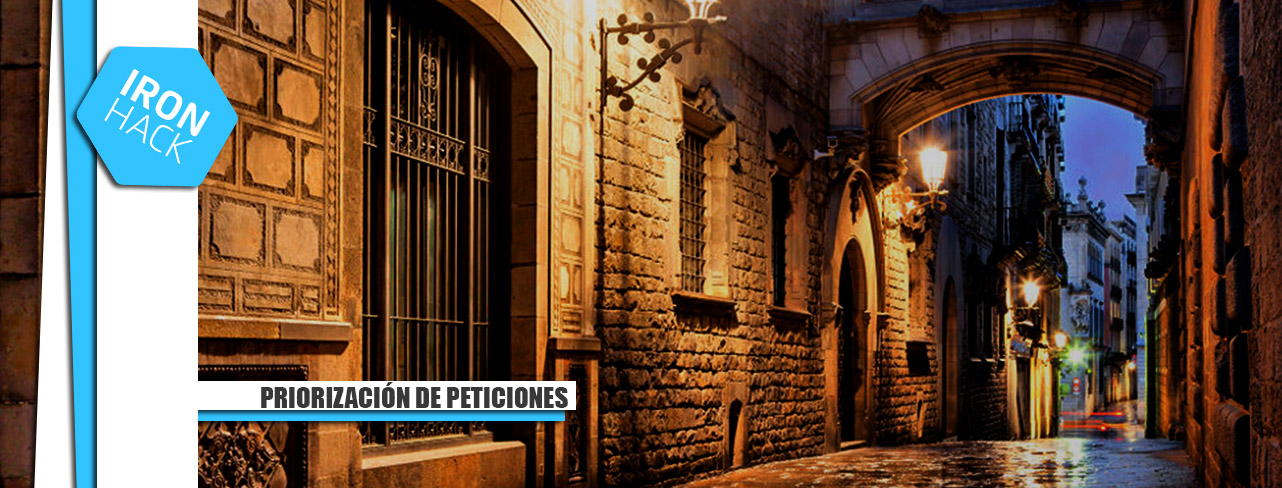

In [1]:
import sys
sys.path.append("../")

In [2]:
import pandas as pd
import src.tratamiento_datos as td

Como voy a priorizar las peticiones teniendo en cuenta el gasto hecho por la empresa a los distintos departamentos, me voy a hacer un pequeño diccionario para poder obserrvar los datos mejor y calcular el requirement_value. Los datos del sueldo son brutos anuales y están sacados de la media que me da google para cada cargo.

In [27]:
#mi_empresa['Designers']['numero'] * mi_empresa['Designers']['sueldo']

mi_empresa = {
    'Designers' : {
    'numero' : 20,
    'sueldo' : 21000,
    'coste' : 0,
    'requirement' : 'Design Companies',
    'requirement_value' : 0},
    
    'UI/UX Engineers' : {
    'numero' : 5,
    'sueldo' : 28000,
    'coste' : 0,
    'requirement' : 'ninguna',
    'requirement_value' : 0},
    
    'Frontend Developers' : {
    'numero' : 10,
    'sueldo' : 23000,
    'coste' : 0,
    'requirement' : '1M companies',
    'requirement_value' : 0},
    
    'Data Engineers' : {
    'numero' : 15,
    'sueldo' : 34000,
    'coste' : 0,
    'requirement' : 'ninguna',
    'requirement_value' : 0},
    
    'Backend Developers' : {
    'numero' : 5,
    'sueldo' : 23000,
    'coste' : 0,
    'requirement' : '1M companies',
    'requirement_value' : 0},
    
    'Account Managers' : {
    'numero' : 20,
    'sueldo' : 20000,
    'coste' : 0,
    'requirement' : 'Airport-Train',
    'requirement_value' : 0},
    
    'Maintenance' : {
    'numero' : 1,
    'sueldo' : 19000,
    'coste' : 0,
    'requirement' : 'Basket Stadium',
    'requirement_value' : 0},
    
    'Executives' : {
    'numero' : 10,
    'sueldo' : 32000,
    'coste' : 0,
    'requirement' : 'Starbuck',
    'requirement_value' : 0},
    
    'President' : {
    'numero' : 1,
    'sueldo' : 100000,
    'coste' : 0,
    'requirement' : 'Vegan',
    'requirement_value' : 0}
}

In [8]:
td.calcular_coste_value(mi_empresa)

In [9]:
empresa = pd.DataFrame(mi_empresa)

In [10]:
empresa = empresa.transpose().sort_values('requirement_value', ascending = False)

In [11]:
empresa = empresa.rename_axis('departamentos').reset_index()

In [12]:
empresa

,departamentos,numero,sueldo,coste,requirement,requirement_value
0,Data Engineers,15,34000,510000,ninguna,10.0
1,Designers,20,21000,420000,Design Companies,8.24
2,Account Managers,20,20000,400000,Airport-Train,7.84
3,Executives,10,32000,320000,Starbuck,6.27
4,Frontend Developers,10,23000,230000,1M companies,4.51
5,UI/UX Engineers,5,28000,140000,ninguna,2.75
6,Backend Developers,5,23000,115000,1M companies,2.25
7,President,1,100000,100000,Vegan,1.96
8,Maintenance,1,19000,19000,Basket Stadium,0.37


In [13]:
requirements =empresa.requirement_value.groupby(empresa.requirement).sum()
ranking = pd.DataFrame(requirements)
ranking = ranking.reset_index()

Vamos a introducir un requirement que no se ha podido añadir hasta ahora porque depende de toda la plantilla que es el de los colegios. calcularemos el coste total que genera el 30% de la plantilla y con eso calcularemos su requirement_value

In [15]:
coste_30_plantilla = empresa.coste.sum()*0.3

In [16]:
valor_referencia = empresa.coste.max()

In [20]:
td.calc_requirement_value(coste_30_plantilla, valor_referencia)

13.26

In [25]:
ranking = ranking.append({'requirement':'colegio', 'requirement_value' : td.calc_requirement_value(coste_30_plantilla, valor_referencia)}, ignore_index = True)

calculemos el requirement_value de cerca de zonas de ocio (bares, discotecas, ¿karaokes?)

In [30]:
coste_plantilla = empresa.coste.sum()

In [51]:
ranking = ranking.append({'requirement' : 'ocio', 'requirement_value' : td.calc_requirement_value(coste_plantilla, valor_referencia)}, ignore_index = True)

Ya por último añadamos las necesidades de Dobby. Como el amor de un perro no tiene precio, le vamos a poner un 5 teniendo en cuenta que hemos valorado de 0 a 10 los gastos en los departamentos

In [32]:
ranking = ranking.append({'requirement' : 'peluqueria_canina', 'requirement_value' : 5}, ignore_index = True)

In [53]:
ranking = ranking.sort_values('requirement_value', ascending = False)

eliminamos la fila donde aparece el requirement ninguna porque no lo vamos a necesitar

In [59]:
ranking = ranking.drop(ranking[ranking['requirement'] == 'ninguna'].index)

In [65]:
ranking.to_csv('../data/ranking')